# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")
combined2=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="left")
# Display the data table for preview
combined
#combined2



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice.
n=len(pd.unique(combined["Mouse ID"]))
n

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#du=combined.duplicated(["Mouse ID","Timepoint"])
#du.head(100)
dup_mice_ID = combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']
#dup_mice_ID = combined.duplicated(subset=['Mouse ID', 'Timepoint'])
dup_mice_ID.unique()


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
combined.loc[combined['Mouse ID']=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
c=len(combined)
clean_combined=combined.loc[combined['Mouse ID']!="g989"]
c_new=len(clean_combined)




In [9]:
# Checking the number of mice in the clean DataFrame.
print(f'We had {c} records but after cleaning faulty data we have now {c_new}')

We had 1893 records but after cleaning faulty data we have now 1880


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_by_df=clean_combined.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_vol= group_by_df['Tumor Volume (mm3)'].mean()
mediam_vol= group_by_df['Tumor Volume (mm3)'].median()
var_vol= group_by_df['Tumor Volume (mm3)'].var()
stan_vol= group_by_df['Tumor Volume (mm3)'].std()
sem_vol= group_by_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
sumnary_vol=pd.DataFrame({'Vol Mean':mean_vol,'Vol Mediam':mediam_vol,'Vol Var':var_vol,'Vol Standard Dev': stan_vol,'Vol SEM':sem_vol})
sumnary_vol
#print(group_by_df)

,Vol Mean,Vol Mediam,Vol Var,Vol Standard Dev,Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_vol2=clean_combined.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem','max','min','count'])
#summary_vol2['count']
summary_vol2

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: count, dtype: int64

## Bar and Pie Charts

<AxesSubplot:>

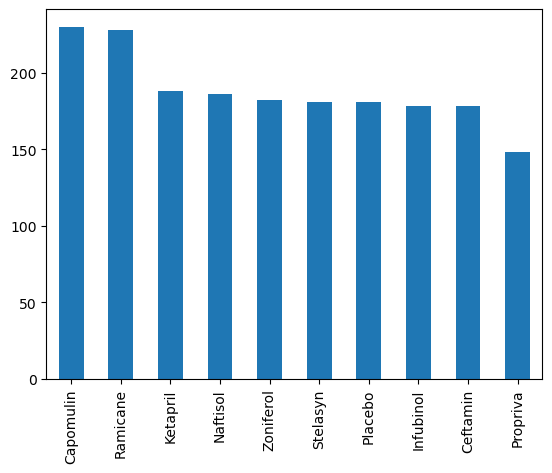

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#summary_vol3=clean_combined.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['count'])
summary_vol3=clean_combined['Drug Regimen'].value_counts()
#summary_vol3
summary_vol3.plot(kind='bar')
#bar_time_points=clean_combined['Drug Regimen']
#ax

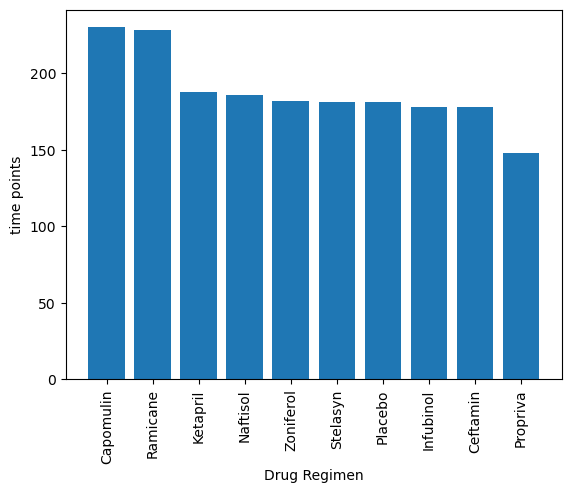

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x=summary_vol3.index
y=summary_vol3.values

#summary_vol3.plot(kind='bar')
plt.bar(x,y)
plt.ylabel('time points',size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()


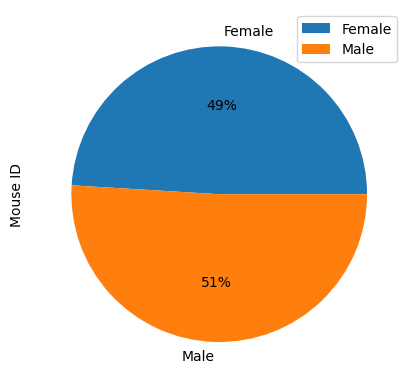

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_type=clean_combined.groupby(['Sex']).count().plot(kind='pie',y='Mouse ID',autopct='%1.0f%%')





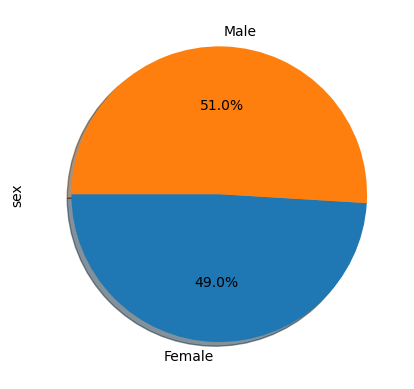

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_type2=clean_combined.groupby(['Sex']).count()

#sex_type2['Mouse ID']
plt.pie(sex_type2['Mouse ID'],shadow=True, startangle=180,
              labels=['Female', 'Male'], autopct="%1.1f%%")
plt.ylabel('sex')


plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific4=clean_combined.loc[(clean_combined["Drug Regimen"]=="Capomulin")|
                        (clean_combined["Drug Regimen"]=="Ramicane")|
                        (clean_combined["Drug Regimen"]=="Infubinol")|
                        (clean_combined["Drug Regimen"]=="Ceftamin") ,:]


# Start by getting the last (greatest) timepoint for each mouse
specific4group2=specific4.groupby(["Mouse ID"])["Timepoint"].max().reset_index().rename(columns={'Timepoint': 'maxTimepoint'})
specific4group_df=pd.DataFrame(specific4group2)
specific4group_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
withmax_merged_df=pd.merge(clean_combined,specific4group_df,on='Mouse ID')
withmax_merged_df.head(100)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),maxTimepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
95,i386,40,67.289621,4,Infubinol,Female,23,29,40
96,q132,0,45.000000,0,Infubinol,Female,1,30,30
97,q132,5,46.716398,1,Infubinol,Female,1,30,30
98,q132,10,47.953844,2,Infubinol,Female,1,30,30


In [54]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_values=[]
# Create empty list to fill with tumor vol data (for plotting)

for i in treatments:
    drug_type=withmax_merged_df.loc[withmax_merged_df['Drug Regimen']==i]
    final_measure_vol_df=drug_type[drug_type['Timepoint']==drug_type['maxTimepoint']]
    values=final_measure_vol_df["Tumor Volume (mm3)"]
    treatment_values.append(values)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {i}: {iqr}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {i}: {lower_bound}')
    print(f'Upper Bound for {i}: {upper_bound}')


    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999


([<matplotlib.axis.XTick at 0x1a27dc41dc0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

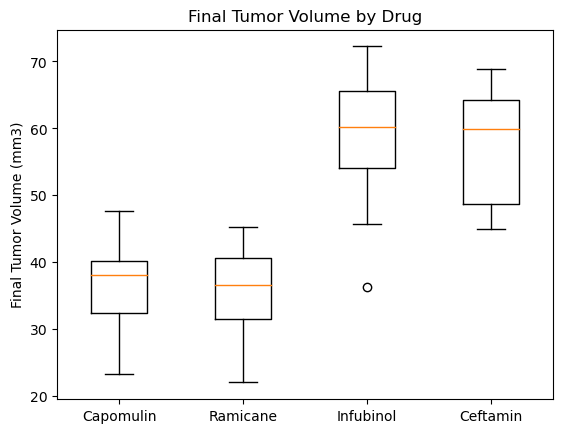

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Plot boxplot
plt.boxplot(treatment_values)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

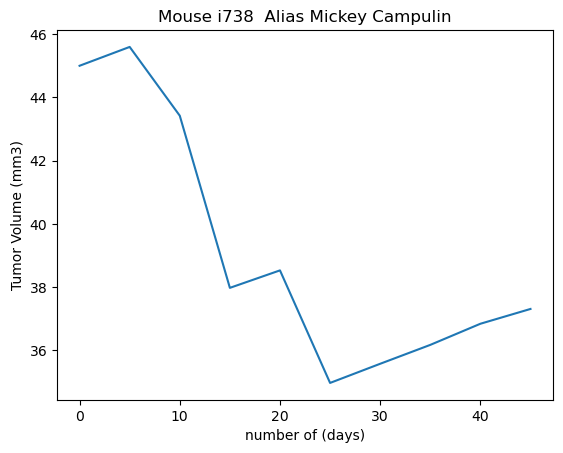

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mickey=clean_combined.loc[clean_combined['Mouse ID']=='i738']
plt.plot(mickey['Timepoint'],mickey['Tumor Volume (mm3)'])
plt.xlabel("number of (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse i738  Alias Mickey Campulin")
plt.show()


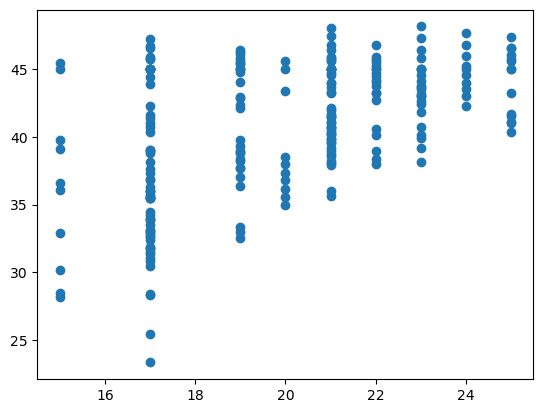

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capom_df = clean_combined.loc[clean_combined['Drug Regimen'] == 'Capomulin',('Mouse ID','Weight (g)','Tumor Volume (mm3)')]
x=capom_df['Weight (g)']
y=capom_df['Tumor Volume (mm3)']
plt.scatter(x, y)
#capom_df['Mouse ID']=='b128'

## Correlation and Regression

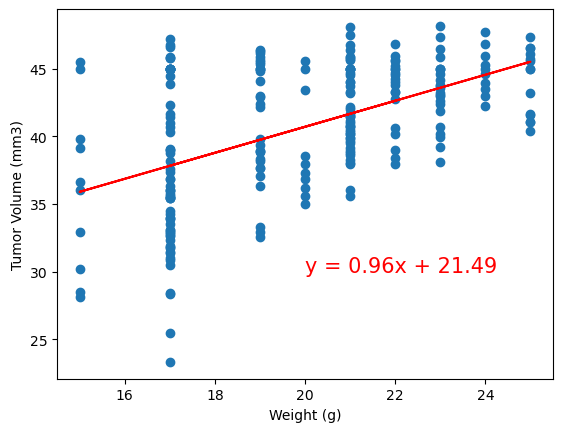

In [89]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

round(st.pearsonr(x,y)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

plt.show()